In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xtesting/test_data.csv
/kaggle/input/training/training_set_labels.csv
/kaggle/input/training-set/training_set_features.csv


**Importing Data**

In [25]:
X=pd.read_csv('data\training_set_features.csv')
y=pd.read_csv('data\training_set_labels.csv')
X_sub=pd.read_csv('data\test_data.csv')

**Handling Missing Values**

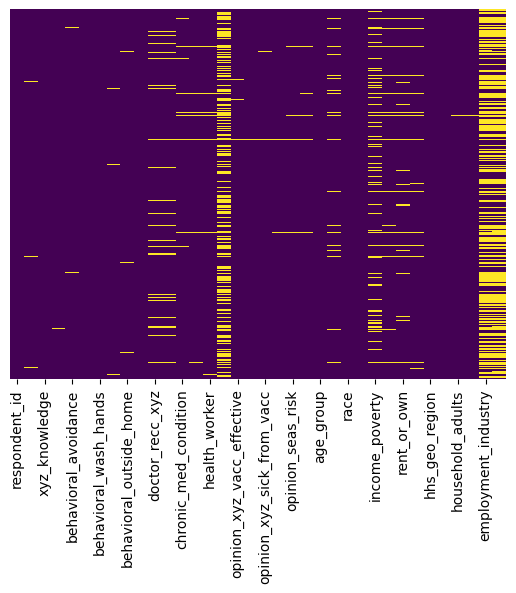

In [26]:
# finding out which columns have missing values using seaborn-heatmap
sns.heatmap(X.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [27]:
# shows the top 5 columns with most missing values in the training data
X.isnull().sum().sort_values(ascending=False).head()


employment_occupation    13470
employment_industry      13330
health_insurance         12274
income_poverty            4423
doctor_recc_xyz           2160
dtype: int64

In [28]:
# we see that employment_occupation, employment_industry, health_insurance have too many missing values. hence its better to drop these columns
X=X.drop('employment_occupation',axis=1)
X=X.drop( 'employment_industry',axis=1)
X=X.drop('health_insurance',axis=1)

In [29]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Get lists of numerical and categorical columns with missing values
numerical_cols_with_nulls = numerical_cols[X[numerical_cols].isnull().any()].tolist()
categorical_cols_with_nulls = categorical_cols[X[categorical_cols].isnull().any()].tolist()

In [30]:
from sklearn.impute import SimpleImputer
# we fill in the missing values in the numerical columns with mean of that column
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_cols_with_nulls] = numerical_imputer.fit_transform(X[numerical_cols_with_nulls])
# we fill in the missing values in the categorical columns with the mode of the column
categorical_imputer=SimpleImputer(strategy='most_frequent')
X[categorical_cols_with_nulls] = categorical_imputer.fit_transform(X[categorical_cols_with_nulls])

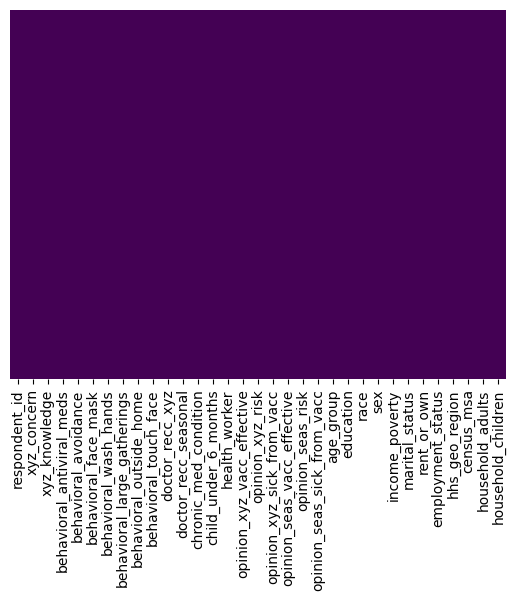

In [31]:
# finally we get rid of all the missing values in the dataframe
sns.heatmap(X.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

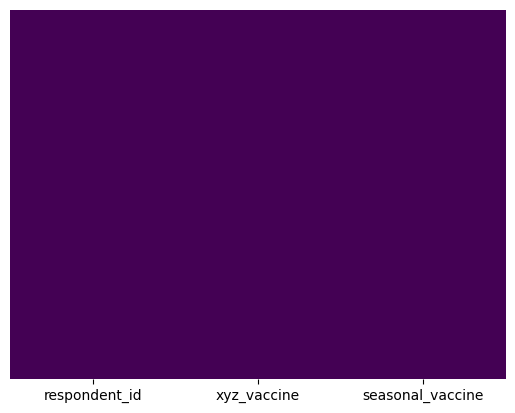

In [32]:
# we see that the y data frame has no missing values
sns.heatmap(y.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.show()

**Categorical Encoding**

In [33]:
# encode all the categorical data
X=pd.get_dummies(data=X,columns=categorical_cols,drop_first=True)
X.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False


In [34]:
# All the values in our data set are either 0 or 1 
# hence we dont need to standardize the data

**Splitting the Data**

In [35]:
#  we remove the respondent_id as it is neither a feature nor a target variable
X = X.drop(columns=['respondent_id'])
y = y.drop(columns=['respondent_id'])  
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Training the Model**

In [36]:
# import logistic regression for binary classification and multioutputclassifier for predicting multiple labels
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
# intiliaze the model
lr=MultiOutputClassifier(LogisticRegression(max_iter=1000,random_state=42))
# train the model
lr.fit(X_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=42))

**Make the prediction**

In [37]:
# predicting 
y_pred=lr.predict_proba(X_test)


In [38]:
# Extract probabilities
xyz_vaccine_proba = y_pred[0][:, 1]  # Probability for xyz_vaccine
seasonal_vaccine_proba = y_pred[1][:, 1]  # Probability for seasonal_vaccine
y_pred=pd.DataFrame({'xyz_vaccine':xyz_vaccine_proba,'seasonal_vaccine':seasonal_vaccine_proba})

**Evaluating the model**

In [39]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr_xyz, tpr_xyz, _ = roc_curve(y_test['xyz_vaccine'], xyz_vaccine_proba)
roc_auc_xyz = auc(fpr_xyz, tpr_xyz)
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test['seasonal_vaccine'], seasonal_vaccine_proba)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

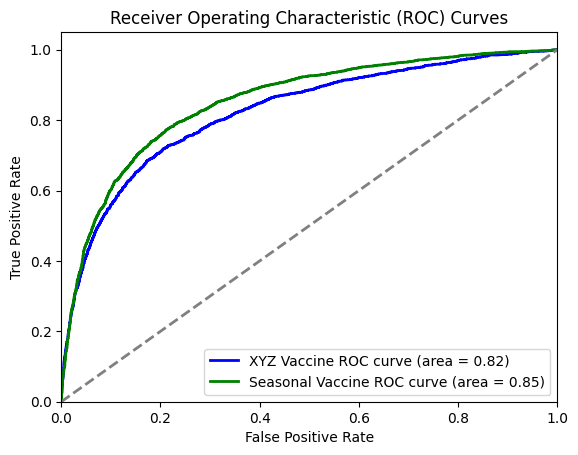

In [40]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_xyz, tpr_xyz, color='blue', lw=2, label='XYZ Vaccine ROC curve (area = %0.2f)' % roc_auc_xyz)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='Seasonal Vaccine ROC curve (area = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [45]:
print('roc-auc score for xyz vaccine is 0.82' )
print('roc-auc score for seasonal vaccine is 0.85 ')
overall_score=(0.82+0.85)/2
print('the overall roc-auc score of the model:',overall_score)

roc-auc score for xyz vaccine is 0.82
roc-auc score for seasonal vaccine is 0.85 
the overall roc-auc score of the model: 0.835


**Now predict for the submission**

In [41]:
#prediciting the submission
y_sub=lr.predict_proba(X_sub)
# Extract probabilities
xyz_vaccine_sub = y_sub[0][:, 1]  # Probability for xyz_vaccine
seasonal_vaccine_sub = y_sub[1][:, 1]  # Probability for seasonal_vaccine

In [42]:
# Create the respondent id  Series with integers from 26707 to 53414
respondent = pd.Series(range(26707, 53415))

**Create the submission file**

In [43]:
submission_df=pd.DataFrame({
    'respondent_id':respondent,
    'xyz-vaccine':xyz_vaccine_sub,
    'seasonal_vaccine':seasonal_vaccine_sub
})

In [44]:
submission_df.to_csv('submission.csv',index=False)